# NYC Taxi Trip Duration EDA
CLiff's COde for EDA.  This is my first Python EDA exercise.  WHat did I learn?  Much less code and faster in R!

## Business Objective

Predict the duration of each NYC Taxi Trip at the point when the trip starts.

- Start datetime: Weekends tend to have lesser trip duration due to less congestion.
- Pickup and Drop Location : Distance between these locations.
- Weather
- Traffic

The data supposedly provided by the assignment includes:

1. Trip
2. Traffic and Geographic Information
3. Weather

The actual data includes only:

- id: unique identifier
- vendor_id: code indicating the provider of the trip
- pickup_datetime: date time meter engaged
- dropoff_datetime: date time when meter was disengaged
- passengers_count: number of passengers
- pickup_longitude
- pickup_latitude
- dropoff_longitude
- dropoff_latitude
- store_and_fwd_flag: Simply a flag indicating if the trip data was captured in real time or stored and then later batch copied
- trip_duration: trip duration in **seconds**


## numpy on Windows Bug:
See https://tinyurl.com/y3dm3h86
Need to downgrade numpy

In [1]:
# !pip install numpy==1.19.3

In [2]:
# libraries
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [3]:
# importing data
df = pd.read_csv('nyc_taxi_trip_duration.csv')
# df.describe()
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [5]:
# data types of the variables
print(f'dtypes: {df.dtypes}')

dtypes: id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


## Missing Values and Outliers

In [6]:
# finding number of missing values in every variable
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There are no missing values.  EDA continues.

## Change variable type/class as appropriate

In [7]:
# Type casting to category 
df['vendor_id'] = df['vendor_id'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

# Passenger_count to category datatype
df['passenger_count'] = df['passenger_count'].astype('category')

# Type Casting to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [8]:
# time based features for pickup_datetime 
df['pickup_datetime_moy'] = df.pickup_datetime.dt.month
df['pickup_datetime_hour'] = df.pickup_datetime.dt.hour
df['pickup_datetime_woy'] = df.pickup_datetime.dt.weekofyear
df['pickup_datetime_dow'] = df.pickup_datetime.dt.dayofweek
df['pickup_datetime_doy'] = df.pickup_datetime.dt.dayofyear

# time based features for dropoff_datetime 
df['dropoff_datetime_moy'] = df.dropoff_datetime.dt.month
df['dropoff_datetime_hour'] = df.dropoff_datetime.dt.hour
df['dropoff_datetime_woy'] = df.dropoff_datetime.dt.weekofyear
df['dropoff_datetime_dow'] = df.dropoff_datetime.dt.dayofweek
df['dropoff_datetime_doy'] = df.dropoff_datetime.dt.dayofyear

In [9]:
# Make some of the new variables above into categorical (day and month)
df['pickup_datetime_dow'] = df['pickup_datetime_dow'].astype('category')
df['pickup_datetime_moy'] = df['pickup_datetime_moy'].astype('category')

df['dropoff_datetime_dow'] = df['dropoff_datetime_dow'].astype('category')
df['dropoff_datetime_moy'] = df['dropoff_datetime_moy'].astype('category')

In [10]:
# drop the original datetime varaibles
df = df.drop(columns = ['pickup_datetime'])
df = df.drop(columns = ['dropoff_datetime'])

## Add distance and average speed to data

In [11]:
# Installed 12/21/20 
#!pip install geopy

In [12]:
df.dtypes

id                         object
vendor_id                category
passenger_count          category
pickup_longitude          float64
pickup_latitude           float64
dropoff_longitude         float64
dropoff_latitude          float64
store_and_fwd_flag       category
trip_duration               int64
pickup_datetime_moy      category
pickup_datetime_hour        int64
pickup_datetime_woy         int64
pickup_datetime_dow      category
pickup_datetime_doy         int64
dropoff_datetime_moy     category
dropoff_datetime_hour       int64
dropoff_datetime_woy        int64
dropoff_datetime_dow     category
dropoff_datetime_doy        int64
dtype: object

In [13]:
# Code to determine distance from Lat Long
# Use Python package geopy (https://pypi.org/project/geopy/
# Note distance is between 2 points, not the roads travelled.
from geopy.distance import great_circle

def distance_travelled(df):
    start = (df['pickup_latitude'], df['pickup_longitude'])
    stop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return great_circle(start, stop).miles

df['distance'] = df.apply(lambda x: distance_travelled(x), axis = 1)

In [ ]:
# In addition to distance, may as well claculate average speed too
df['speed'] = (df.distance/(df.trip_duration/3600))

df[['distance', 'speed']].head(10)

### Look for Outliers

In [15]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(x = data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id                     729322 non-null  object  
 1   vendor_id              729322 non-null  category
 2   passenger_count        729322 non-null  category
 3   pickup_longitude       729322 non-null  float64 
 4   pickup_latitude        729322 non-null  float64 
 5   dropoff_longitude      729322 non-null  float64 
 6   dropoff_latitude       729322 non-null  float64 
 7   store_and_fwd_flag     729322 non-null  category
 8   trip_duration          729322 non-null  int64   
 9   pickup_datetime_moy    729322 non-null  category
 10  pickup_datetime_hour   729322 non-null  int64   
 11  pickup_datetime_woy    729322 non-null  int64   
 12  pickup_datetime_dow    729322 non-null  category
 13  pickup_datetime_doy    729322 non-null  int64   
 14  dropoff_datetime_moy

True
True


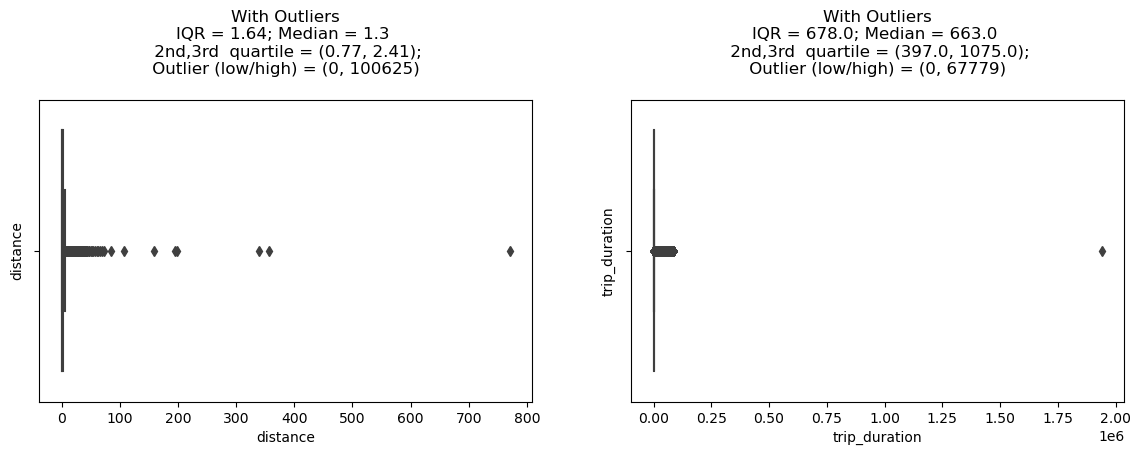

In [17]:
eval_outliers = ['distance', 'trip_duration']
UVA_outlier(df, eval_outliers, include_outlier = True)

There appears to be an outlier for trip duration.  The passenger count looks ok.  Let's remove the trip duration record.

It appears to be an extreme value.  There also appear to be trips of an impossibly short duration.  Eliminate these too.

In [18]:
print( df['trip_duration'].nlargest(5))
print( df['trip_duration'].nsmallest(5))

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
Name: trip_duration, dtype: int64
70318     1
95823     1
102646    1
119181    1
296874    1
Name: trip_duration, dtype: int64


In [19]:
df['trip_duration'].describe()

count    7.293220e+05
mean     9.522291e+02
std      3.864626e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.630000e+02
75%      1.075000e+03
max      1.939736e+06
Name: trip_duration, dtype: float64

In [20]:
print(df['trip_duration'].max())

print(df['trip_duration'].min())

1939736
1


In [21]:
# Remove the extreme value
df = df[df.trip_duration!=df['trip_duration'].max()]

# Remove 1 sec trips too
df = df[df.trip_duration!=df['trip_duration'].min()]

In [22]:
print( df['trip_duration'].nlargest(5))
print( df['trip_duration'].nsmallest(5))

259437    86391
119185    86387
177225    86378
496391    86377
90557     86369
Name: trip_duration, dtype: int64
3169     2
20225    2
43683    2
47266    2
52233    2
Name: trip_duration, dtype: int64


## Univariate Analysis

### Continuous Variables

In [23]:
# Numerical datatypes
df.select_dtypes(include=['int64','float64','Int64']).dtypes

pickup_longitude         float64
pickup_latitude          float64
dropoff_longitude        float64
dropoff_latitude         float64
trip_duration              int64
pickup_datetime_hour       int64
pickup_datetime_woy        int64
pickup_datetime_doy        int64
dropoff_datetime_hour      int64
dropoff_datetime_woy       int64
dropoff_datetime_doy       int64
distance                 float64
speed                    float64
dtype: object

In [24]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

In [25]:
# Pick interesting numerical variables to evalaute
pickup = ['pickup_longitude', 'pickup_latitude']
dropoff = ['dropoff_longitude', 'dropoff_latitude']
other_trip = ['trip_duration','distance','speed']

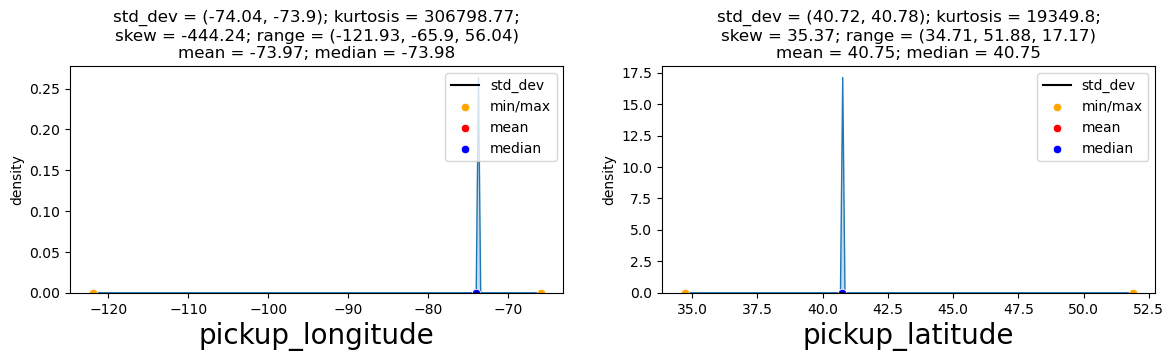

In [26]:
UVA_numeric(df, pickup)

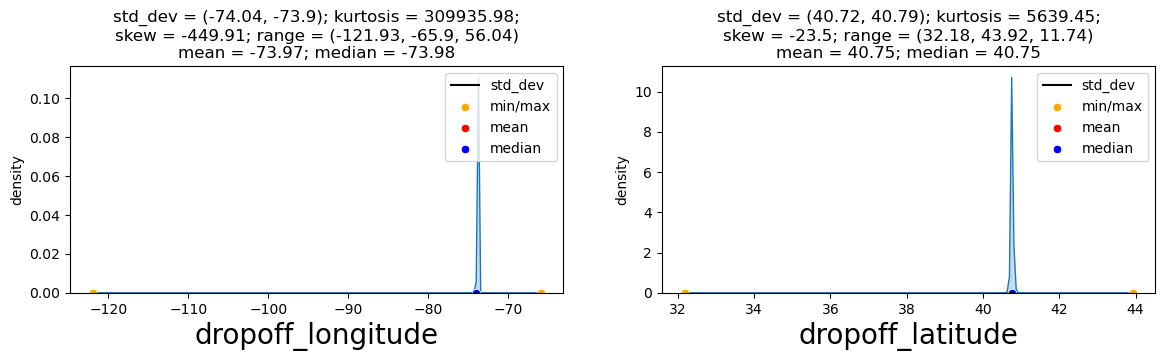

In [27]:
UVA_numeric(df, dropoff)

Since the pickup and dropoff locations are highly skewed and extreme values are suggested, let's look more closely around the mean values to get a more clear picture.

In [28]:
# copying pickup_dropoff_location
tmpData = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
# I ran the plots below to select the values to best 
tmpData = tmpData[(tmpData.pickup_longitude > -74.5) & (tmpData.pickup_longitude < -73.5)]
tmpData = tmpData[(tmpData.pickup_latitude > 40.5) & (tmpData.pickup_latitude < 41)]
tmpData = tmpData[(tmpData.dropoff_longitude > -74.5) & (tmpData.dropoff_longitude < -73.5)]
tmpData = tmpData[(tmpData.dropoff_latitude > 40.5) & (tmpData.dropoff_latitude < 41)]

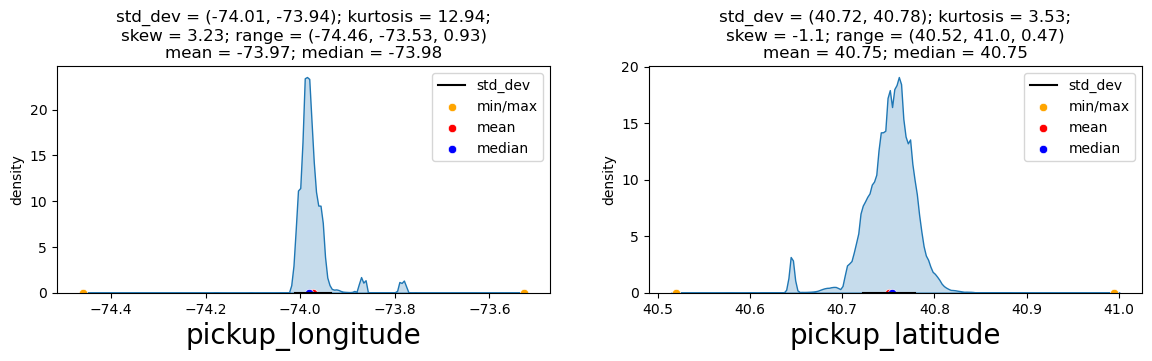

In [29]:
UVA_numeric(tmpData, pickup)

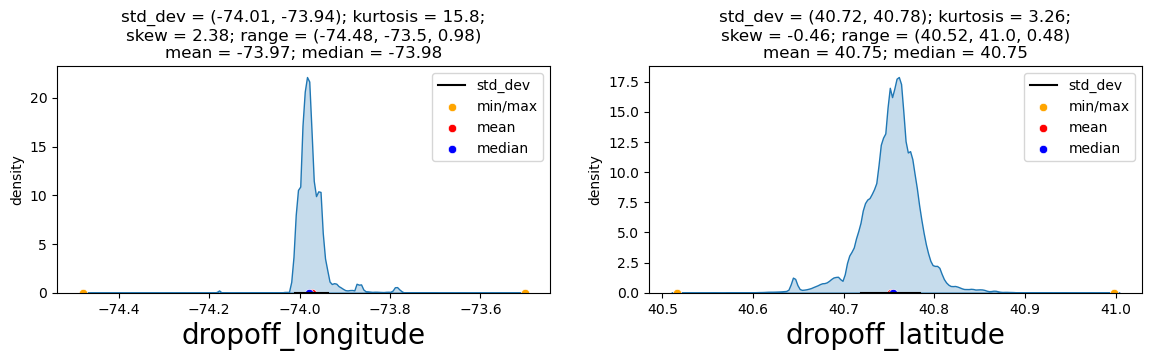

In [30]:
UVA_numeric(tmpData, dropoff)

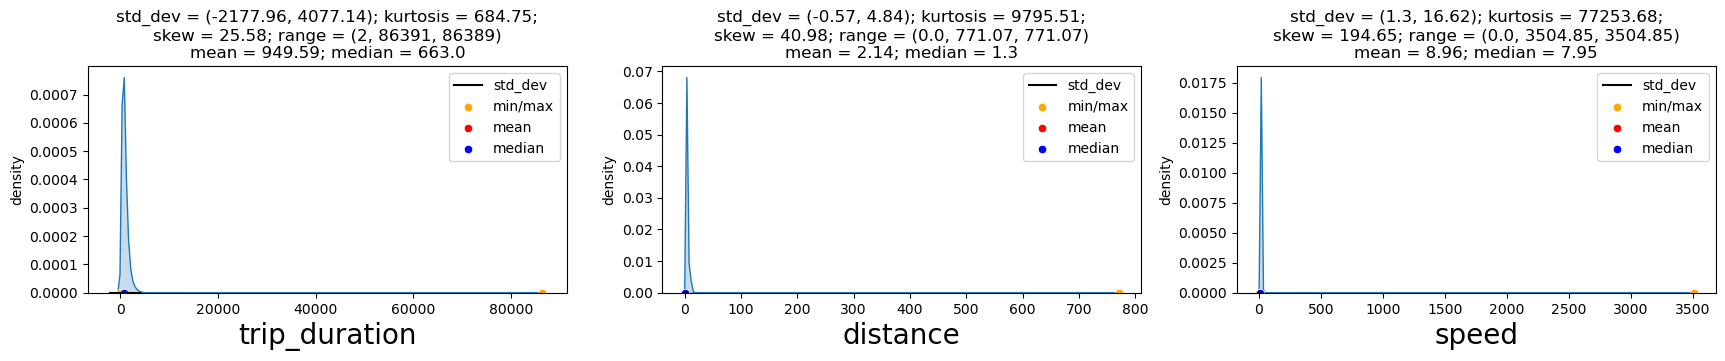

In [31]:
UVA_numeric(df, other_trip)

The lat and long data needs to be further evaluated.  There are extreme values, outliers and significant skewness.

The same consideration needs to me made to trip duration, distance and speed.


### Categorical Anlysis

In [32]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(x=norm_count, y=norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

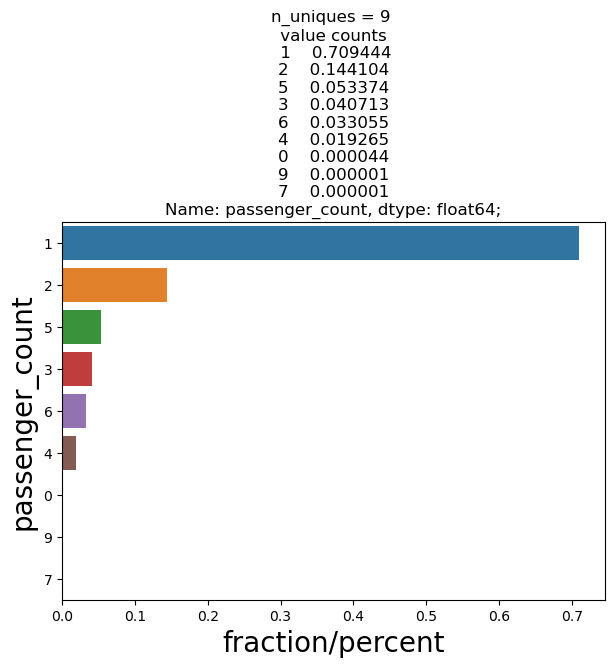

In [33]:
UVA_category(df, ['passenger_count'])

Findings:

- Median Number of Passengers in a Taxi = 1
- Most taxis carry 1-2 passengers
- skewness is significantly biased towards lesser number of passengers 
- kurtosis is high; 

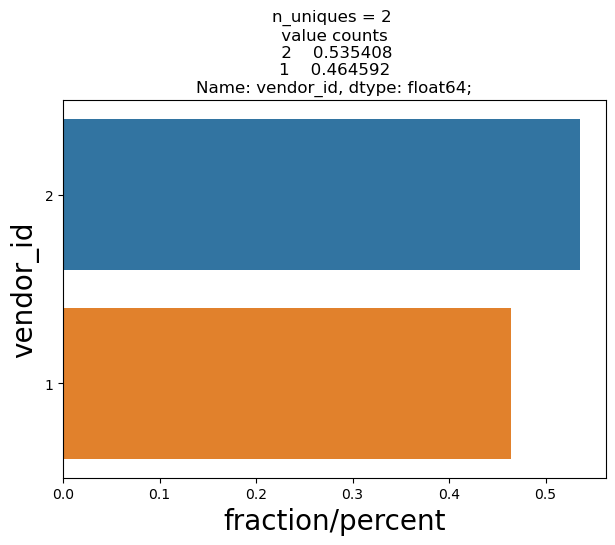

In [34]:
UVA_category(df, ['vendor_id'])

Might want to evaluate of each vendor has the same trip characteristics.


## Bivariate Analysis

In [35]:
# isolating numerical datatypes
numerical = df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

pickup_longitude         float64
pickup_latitude          float64
dropoff_longitude        float64
dropoff_latitude         float64
trip_duration              int64
pickup_datetime_hour       int64
pickup_datetime_woy        int64
pickup_datetime_doy        int64
dropoff_datetime_hour      int64
dropoff_datetime_woy       int64
dropoff_datetime_doy       int64
distance                 float64
speed                    float64
dtype: object

In [36]:
# calculating correlation - by default uses Pearson Coefficient
correlation = numerical.dropna().corr()
correlation

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_datetime_hour,pickup_datetime_woy,pickup_datetime_doy,dropoff_datetime_hour,dropoff_datetime_woy,dropoff_datetime_doy,distance,speed
pickup_longitude,1.000000,0.047667,0.780643,0.118492,0.041566,0.010781,0.006588,0.003745,0.011190,0.006516,0.003771,0.251486,0.095376
pickup_latitude,0.047667,1.000000,0.119994,0.479343,-0.044444,0.011407,-0.004804,-0.001254,0.018043,-0.004803,-0.001320,-0.128447,0.116880
dropoff_longitude,0.780643,0.119994,1.000000,0.149619,0.025335,-0.021996,0.005546,0.003765,-0.023176,0.005558,0.003790,0.132365,0.045991
dropoff_latitude,0.118492,0.479343,0.149619,1.000000,-0.035453,0.014243,-0.002411,-0.001628,0.018158,-0.002415,-0.001673,-0.153772,-0.054413
trip_duration,0.041566,-0.044444,0.025335,-0.035453,1.000000,0.005486,0.011047,0.013067,0.004080,0.009716,0.013777,0.152150,-0.033860
pickup_datetime_hour,0.010781,0.011407,-0.021996,0.014243,0.005486,1.000000,-0.016999,-0.003562,0.934591,-0.017105,-0.003282,-0.016265,-0.064750
pickup_datetime_woy,0.006588,-0.004804,0.005546,-0.002411,0.011047,-0.016999,1.000000,0.713276,-0.017190,0.999310,0.713274,0.021719,0.007388
pickup_datetime_doy,0.003745,-0.001254,0.003765,-0.001628,0.013067,-0.003562,0.713276,1.000000,-0.004279,0.713921,0.999998,0.017204,-0.016920
dropoff_datetime_hour,0.011190,0.018043,-0.023176,0.018158,0.004080,0.934591,-0.017190,-0.004279,1.000000,-0.017085,-0.004683,-0.020940,-0.073024
dropoff_datetime_woy,0.006516,-0.004803,0.005558,-0.002415,0.009716,-0.017105,0.999310,0.713921,-0.017085,1.000000,0.713917,0.021667,0.007390


In [37]:
c = numerical.corr().abs()
c

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_datetime_hour,pickup_datetime_woy,pickup_datetime_doy,dropoff_datetime_hour,dropoff_datetime_woy,dropoff_datetime_doy,distance,speed
pickup_longitude,1.000000,0.047667,0.780643,0.118492,0.041566,0.010781,0.006588,0.003745,0.011190,0.006516,0.003771,0.251486,0.095376
pickup_latitude,0.047667,1.000000,0.119994,0.479343,0.044444,0.011407,0.004804,0.001254,0.018043,0.004803,0.001320,0.128447,0.116880
dropoff_longitude,0.780643,0.119994,1.000000,0.149619,0.025335,0.021996,0.005546,0.003765,0.023176,0.005558,0.003790,0.132365,0.045991
dropoff_latitude,0.118492,0.479343,0.149619,1.000000,0.035453,0.014243,0.002411,0.001628,0.018158,0.002415,0.001673,0.153772,0.054413
trip_duration,0.041566,0.044444,0.025335,0.035453,1.000000,0.005486,0.011047,0.013067,0.004080,0.009716,0.013777,0.152150,0.033860
pickup_datetime_hour,0.010781,0.011407,0.021996,0.014243,0.005486,1.000000,0.016999,0.003562,0.934591,0.017105,0.003282,0.016265,0.064750
pickup_datetime_woy,0.006588,0.004804,0.005546,0.002411,0.011047,0.016999,1.000000,0.713276,0.017190,0.999310,0.713274,0.021719,0.007388
pickup_datetime_doy,0.003745,0.001254,0.003765,0.001628,0.013067,0.003562,0.713276,1.000000,0.004279,0.713921,0.999998,0.017204,0.016920
dropoff_datetime_hour,0.011190,0.018043,0.023176,0.018158,0.004080,0.934591,0.017190,0.004279,1.000000,0.017085,0.004683,0.020940,0.073024
dropoff_datetime_woy,0.006516,0.004803,0.005558,0.002415,0.009716,0.017105,0.999310,0.713921,0.017085,1.000000,0.713917,0.021667,0.007390


In [38]:
# flattens to dataframe
s = c.unstack()
s

pickup_longitude  pickup_longitude         1.000000
                  pickup_latitude          0.047667
                  dropoff_longitude        0.780643
                  dropoff_latitude         0.118492
                  trip_duration            0.041566
                                             ...   
speed             dropoff_datetime_hour    0.073024
                  dropoff_datetime_woy     0.007390
                  dropoff_datetime_doy     0.016896
                  distance                 0.575864
                  speed                    1.000000
Length: 169, dtype: float64

In [39]:
so = s.sort_values(kind = "quicksort", ascending = False)
so = pd.DataFrame(so, columns = ["Pearson Correlation"])
so[so['Pearson Correlation'] < 1].head(20)

,,Pearson Correlation
dropoff_datetime_doy,pickup_datetime_doy,0.999998
pickup_datetime_doy,dropoff_datetime_doy,0.999998
pickup_datetime_woy,dropoff_datetime_woy,0.999310
dropoff_datetime_woy,pickup_datetime_woy,0.999310
pickup_datetime_hour,dropoff_datetime_hour,0.934591
dropoff_datetime_hour,pickup_datetime_hour,0.934591
pickup_longitude,dropoff_longitude,0.780643
dropoff_longitude,pickup_longitude,0.780643
pickup_datetime_doy,dropoff_datetime_woy,0.713921
dropoff_datetime_woy,pickup_datetime_doy,0.713921


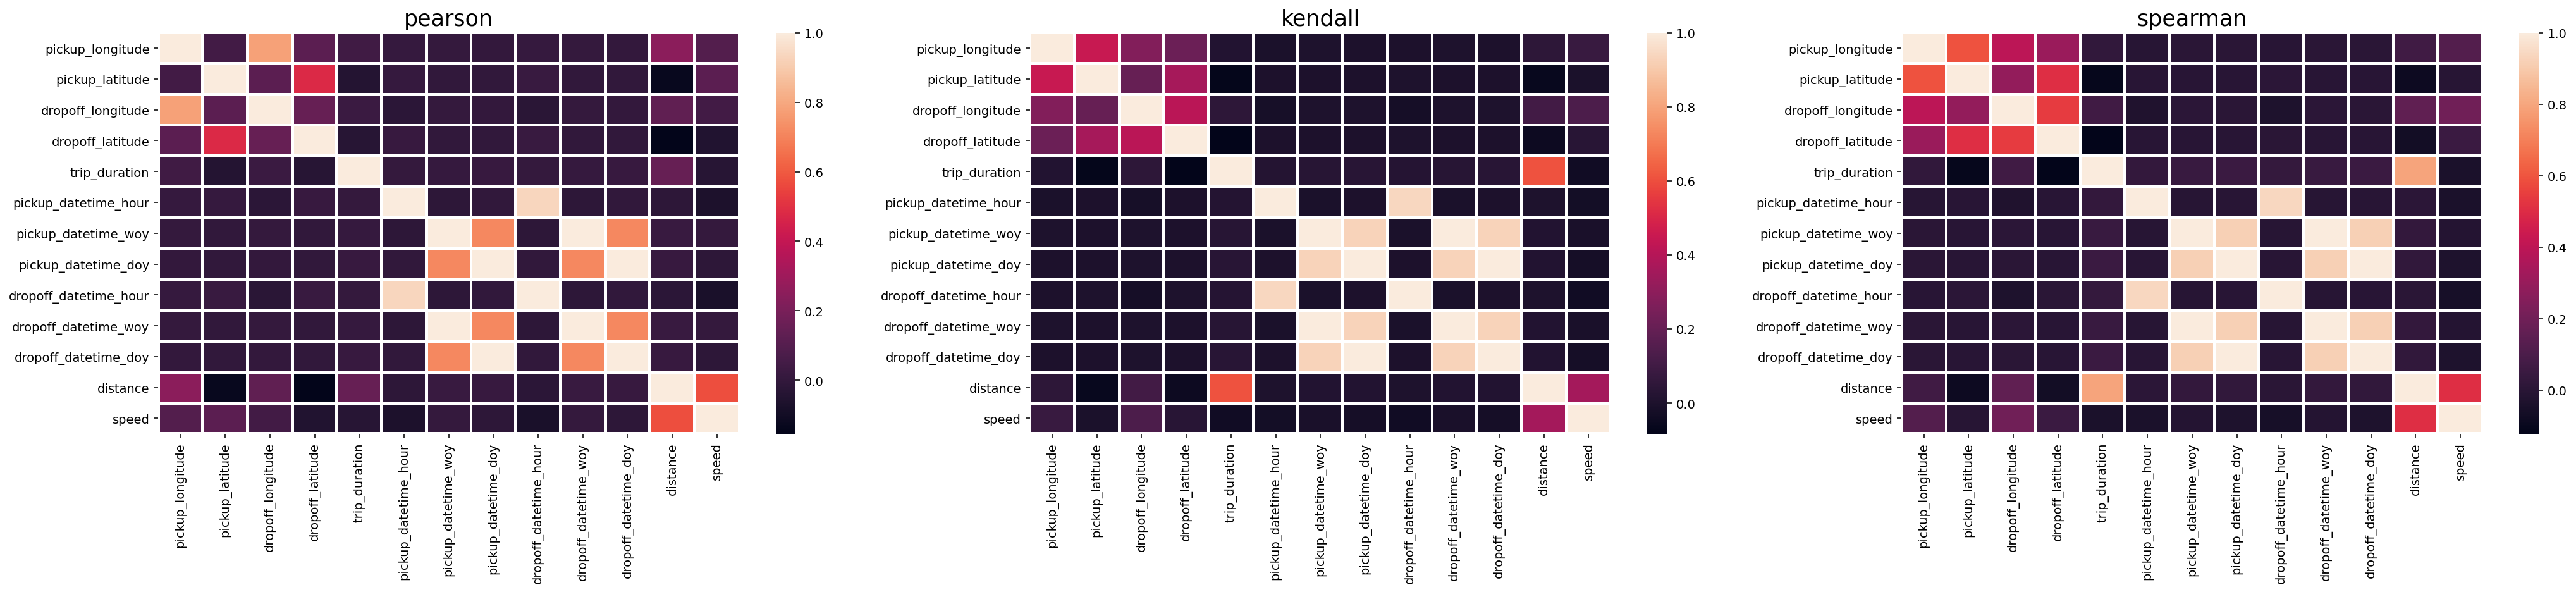

In [40]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)


- Spearman correlation seems to have higher correlation values in same areas of the heatmap where they are less in the Pearson and Kendall correlations.
- There are many variables with insignificant correlation.

Pair Plots would often be evalauted but much of this test data does not lend itslf too well.  H


### Bivariate Analysis with Continuous-Categorical Variables

Potential hypotheses to consider:

- Are taxis with higher passenger_counts more likely to have higher trip durations?
- Is there a difference in trip durations between Vendor 1 land Vendor 2?
- Do store and forward trips impact trip duration?

Note:  Dvelopment of the hypotheses will be nearly impossible to automate.  Suggest expnading the code to run all compinations of continuous-categorical variables

In [41]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [42]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [43]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

Are taxis with higher passenger_counts more likely to have higher trip durations?

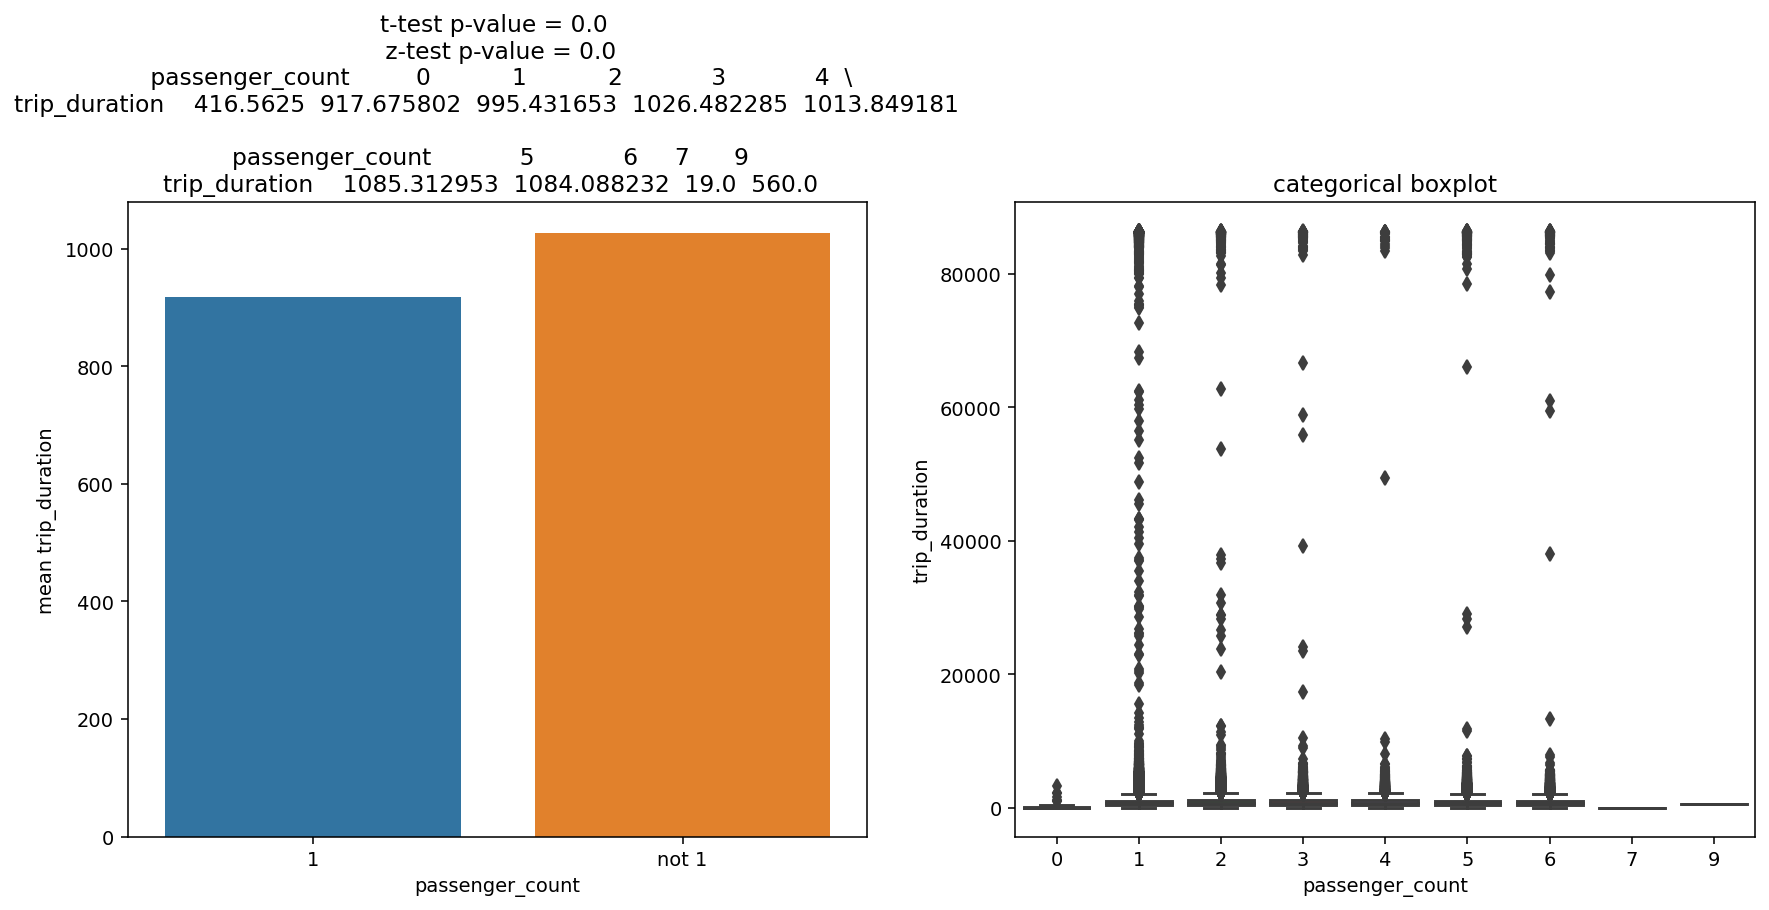

In [44]:
Bivariate_cont_cat(df, 'trip_duration', 'passenger_count', 1)

More analysis is required.  The number of trips per count of passenger might be intereting.  It does appear more passengers may indicate longer trips given the very low p-value.

Is there a difference in trip durations between Vendor 1 land Vendor 2?

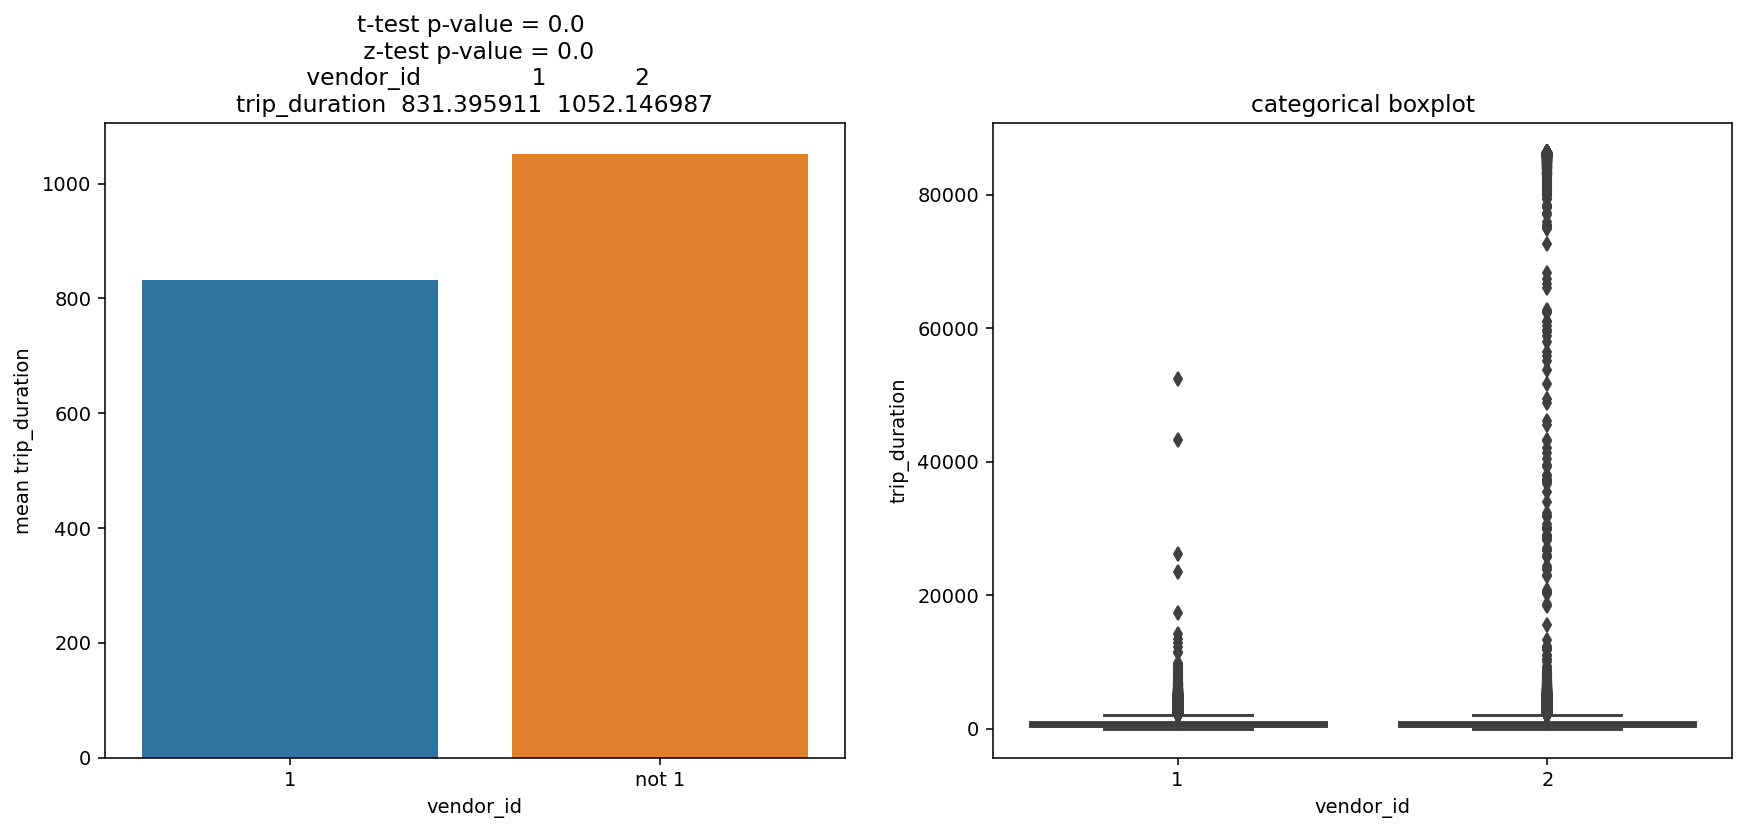

In [45]:
Bivariate_cont_cat(df, 'trip_duration', 'vendor_id', 1)

Reject the null hypothesis that Vendor 1 is more likely to deal with higher trip durations than Vendor 2.

Do store and forward trips impact trip duration?

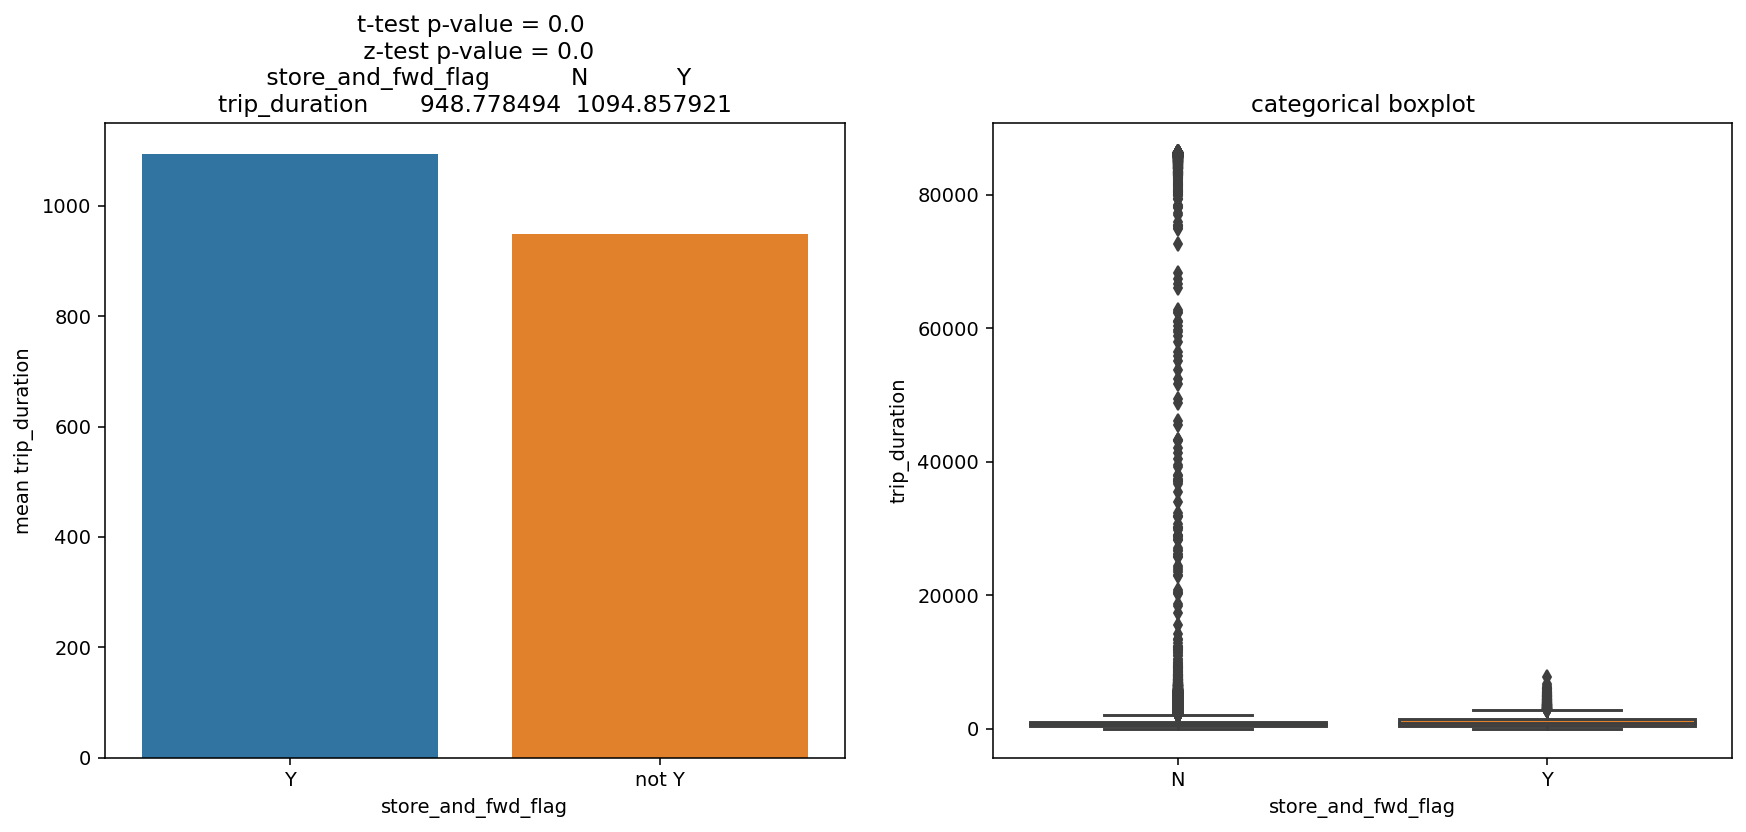

In [46]:
Bivariate_cont_cat(df, 'trip_duration', 'store_and_fwd_flag', 'Y')

Reject the null hypothesis that taxis that store and forward trips experience lower trip duration.

### Bivariate Categorical - Categorical Variables

In [47]:
df.select_dtypes('category').dtypes


vendor_id               category
passenger_count         category
store_and_fwd_flag      category
pickup_datetime_moy     category
pickup_datetime_dow     category
dropoff_datetime_moy    category
dropoff_datetime_dow    category
dtype: object

In [48]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

A few hypotheses to demo the function above:

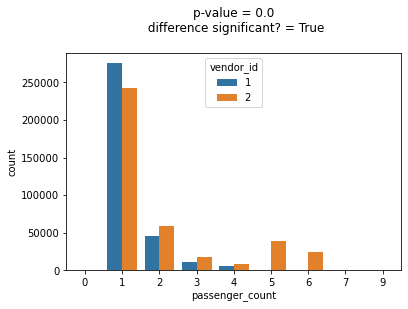

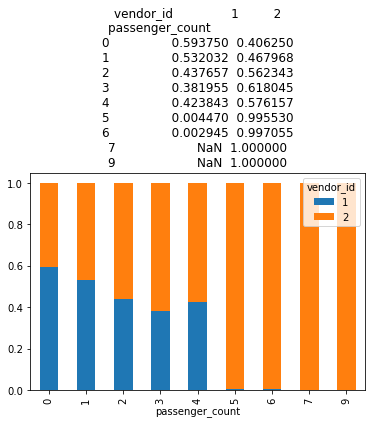

In [49]:
BVA_categorical_plot(df, 'vendor_id', 'passenger_count')

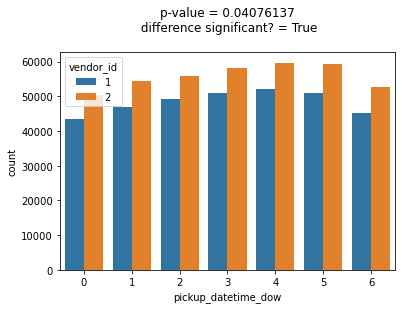

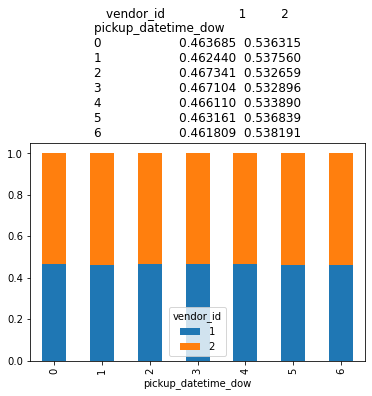

In [50]:
BVA_categorical_plot(df, 'vendor_id', 'pickup_datetime_dow')

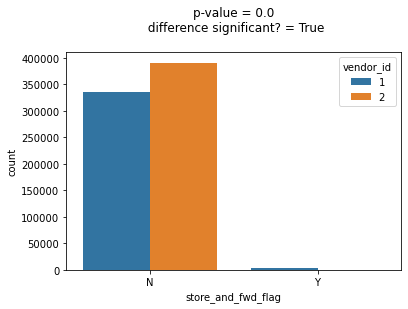

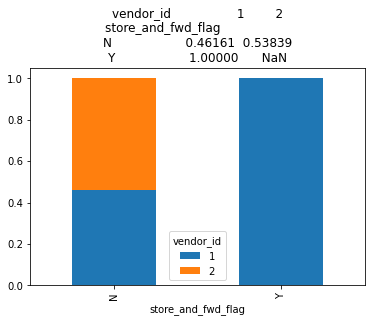

In [51]:
BVA_categorical_plot(df, 'vendor_id', 'store_and_fwd_flag')

## Multivariate Analysis

In [52]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')

The data is not ideal for many interesting examples of multivariate analysis. A few are provided below to serve as examples.

To improve the visualizations and minimize the impact of extreme values and outliers, the data has been modified with a log function.  The duration was alo changed from seconds to minutes to make the y axis simpler to understand.  (Admittedly, this should have been done earlier ;) )

In [53]:
df['trip_duration_minutes'] = np.log(df['trip_duration'].apply(lambda x: x/60).astype('float'))
df['trip_duration_minutes'].head()

0    1.897120
1    2.908721
2    3.305054
3    2.945316
4    2.648536
Name: trip_duration_minutes, dtype: float64

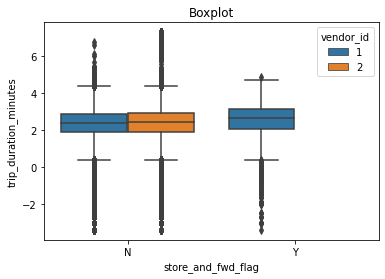

In [54]:
Grouped_Box_Plot(df,'trip_duration_minutes', 'store_and_fwd_flag', 'vendor_id')

As warned, not very interesting!

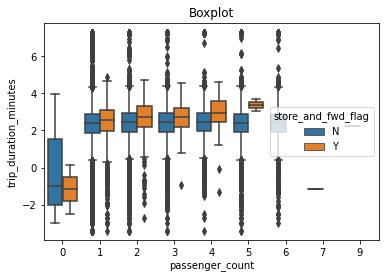

In [55]:
Grouped_Box_Plot(df,'trip_duration_minutes', 'passenger_count', 'store_and_fwd_flag')

Passenger count records need to be evaluated - not possible to have no passengers.  Perhaps substitute with mean passengers.  This can be decided during feature engineering.

# Quick Intro to Python EDA Module Options

## Pandas Profiling
Pandas Profiling is a python library that not only automates the EDA process but also creates a detailed EDA report in just a few lines of code. Pandas Profiling can be used easily for large datasets as it is blazingly fast and creates reports in a few seconds.

In [56]:
#!pip install pandas-profiling

In [57]:
import pandas as pd
from pandas_profiling import ProfileReport

# just 2 lines of code
design_report = ProfileReport(df)
design_report.to_file(output_file='Python_EDA_PandasProfiling.html')

## Sweetviz

Sweetviz is a python library that focuses on exploring the data with the help of beautiful and high-density visualizations. It not only automates the EDA but is *also used for comparing datasets and drawing inferences from it*.  This could be used to compare results at different times to compare and identify data drift!

In [58]:
#!pip install sweetviz

In [59]:
import sweetviz as sv

# Just 2 lines of code again!
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_EDA.html')


Report sweet_EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
